     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.7 kB 2.6 MB/s eta 0:00:01
     ----------------------------------- ---- 51.2/57.7 kB 2.6 MB/s eta 0:00:01
     ----------------------------------- ---- 51.2/57.7 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 302.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 11.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.0 MB 10.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.5/2.0 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.0 MB 10.5 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


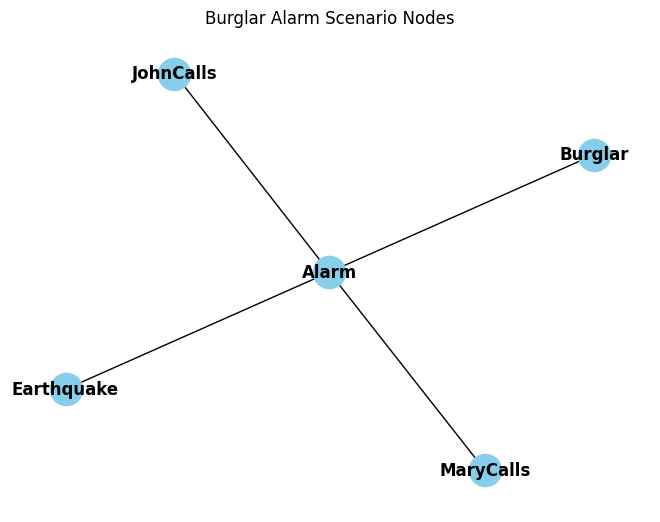

Burglar
+------------+-------+
| Burglar(0) | 0.999 |
+------------+-------+
| Burglar(1) | 0.001 |
+------------+-------+
Alarm
+------------+---------------+---------------+---------------+---------------+
| Burglar    | Burglar(0)    | Burglar(0)    | Burglar(1)    | Burglar(1)    |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94          | 0.95          |
+------------+---------------+---------------+---------------+---------------+
Earthquake
+---------------+-------+
| Earthquake(0) | 0.998 |
+---------------+-------+
| Earthquake(1) | 0.002 |
+---------------+-------+
JohnCalls
+--------

<Figure size 640x480 with 0 Axes>

In [1]:
!pip install pgmpy
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
# Define the structure of the Bayesian Network
model = BayesianNetwork([('Burglar', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm',
'JohnCalls'), ('Alarm', 'MaryCalls')])
model01=nx.Graph()
model01.add_nodes_from(['Burglar','Alarm','Earthquake','JohnCalls','MaryCalls'])
model01.add_edges_from([('Burglar', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm',
'JohnCalls'), ('Alarm', 'MaryCalls'),])
# CPD for the Burglar variable
cpd_burglar = TabularCPD(variable='Burglar', variable_card=2, values=[[0.999],
[0.001]])
# CPD for the Earthquake variable
cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2,
values=[[0.998], [0.002]])
# CPD for the Alarm variable given Burglar and Earthquake
cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,values=[[0.999, 0.71,
0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],evidence=['Burglar', 'Earthquake'],
evidence_card=[2, 2])
# CPD for JohnCalls given Alarm
cpd_johncalls = TabularCPD(variable='JohnCalls', variable_card=2,values=[[0.95,
0.1], [0.05, 0.9]],evidence=['Alarm'], evidence_card=[2])
# CPD for MaryCalls given Alarm
cpd_marycalls = TabularCPD(variable='MaryCalls', variable_card=2,values=[[0.7,
0.01], [0.3, 0.99]],evidence=['Alarm'], evidence_card=[2])
model.add_cpds(cpd_burglar, cpd_earthquake, cpd_alarm, cpd_johncalls,
cpd_marycalls)
model.check_model()
#pos = nx.spring_layout(model01, seed=42)
nx.draw(model01, with_labels=True,font_weight='bold',node_color='skyblue',
node_size=200,alpha=1,linewidths=10)
plt.title("Burglar Alarm Scenario Nodes")
plt.show()
plt.close()
model.get_cpds()
print('Burglar')
print(model.get_cpds('Burglar'))
print('Alarm')

print(model.get_cpds('Alarm'))
print('Earthquake')
print(model.get_cpds('Earthquake'))
print('JohnCalls')
print(model.get_cpds('JohnCalls'))
print('MarryCalls')
print(model.get_cpds('MaryCalls'))
infer=VariableElimination(model)
model.get_independencies()
plt.savefig('model.png')
variables=['Burglar','Alarm','Earthquake','JohnCalls','MaryCalls']
joint_distribution=infer.query(variables=variables)
print("Join distribution:",joint_distribution.values)